In [ ]:
!pip install sympy SumOfSquares

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
import sympy as sp
import scipy
from SumOfSquares import SOSProblem

def plot_sublevel_set(U, num_points=51):
    """Plot the sublevel set where U(x,y) <= 1
    """
    theta = np.linspace(0, 2*np.pi, num_points)
    r = np.zeros_like(theta)
    for i in range(num_points-1):
        f = lambda r: U(r*np.cos(theta[i]), r*np.sin(theta[i])) - 1
        result = scipy.optimize.root_scalar(f, method='bisect', bracket=[0.0, 10.0])
        if result.converged:
            r[i] = result.root
        else:
            raise RuntimeError(f'Not converged for theta={theta[i]} due to {result.flag}')
    r[-1] = r[0]
    return plt.fill(r * np.cos(theta), r * np.sin(theta))[0]

In [113]:
x1, x2 = sp.symbols('x_1 x_2')
x = sp.Matrix([x1, x2])

A1 = sp.Matrix([[5, -4], [-4, 5]])
A2 = A1 @ sp.Matrix([[-1, 0], [0, 1]])

U = (x.T @ A1.T @ A1 @ x) * (x.T @ A2.T @ A2 @ x) / 2
dUdx = U.jacobian(x)
U = U[0]

x_dot = (U - sp.S(1)) * dUdx.T
x_dot = sp.expand(x_dot)

display(x_dot)

x1_dot = sp.lambdify([x1, x2], x_dot[0], 'numpy')
x2_dot = sp.lambdify([x1, x2], x_dot[1], 'numpy')

Matrix([
[ 2825761*x_1**7 - 7660317*x_1**5*x_2**2 + 7440483*x_1**3*x_2**4 - 3362*x_1**3 - 2553439*x_1*x_2**6 + 3038*x_1*x_2**2],
[-2553439*x_1**6*x_2 + 7440483*x_1**4*x_2**3 - 7660317*x_1**2*x_2**5 + 3038*x_1**2*x_2 + 2825761*x_2**7 - 3362*x_2**3]])

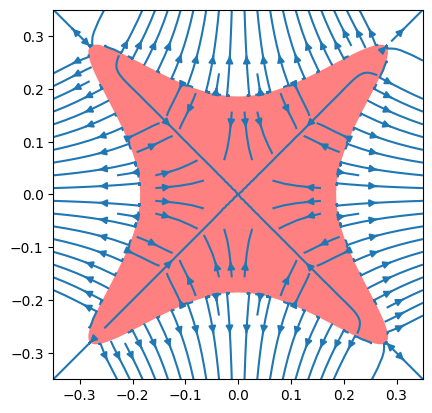

In [140]:
x1_val = np.linspace(-0.35, 0.35, 101)
x2_val = np.linspace(-0.35, 0.35, 101)
x1_val, x2_val = np.meshgrid(x1_val, x2_val)

x1_dot_val = x1_dot(x1_val, x2_val)
x2_dot_val = x2_dot(x1_val, x2_val)

shape = plot_sublevel_set(sp.lambdify([x1,x2], U), num_points=1000)
shape.set(facecolor=[1,0.5,0.5], edgecolor=[0,0,0], linewidth=0)
plt.streamplot(x1_val, x2_val, x1_dot_val, x2_dot_val)
plt.axis('square')
plt.show()